# LA 10 - Jacobians 1

In [14]:
import sympy
from sympy.interactive import printing
printing.init_printing(use_latex=True)
import robotics_sympy
from sympy import sin, cos#living on the edge

In [15]:
p90 = sympy.pi/2
n90 = -p90

In [16]:
sympy.sin

sin

In [17]:
L1, L2, th1, th2 = sympy.symbols(['L_1','L_2','theta_1','theta_2'])

In [18]:
th1dot, th2dot = sympy.symbols(['\\dot{\\theta_1}','\\dot{\\theta_2}'])

## A word of caution

Be very careful when mixing symbolic and numeric stuff in the same notebook
- I sometimes try to keep them in separate notebooks

If you import the same thing from `sympy` and `numpy`, whatever gets imported last is what is used:

In [19]:
from numpy import pi

In [20]:
pi

In [21]:
from sympy import pi

In [22]:
pi

In [23]:
pi

In [24]:
sympy.sin(pi)

## Problem 1

<img src="https://faculty.gvsu.edu/kraussry/445_images/learning_activities/jacobians/two_link_with_twist.png" width=500px>


- find $\bar{v}_{tip}$
- this is 3D but 2DOF
    - how might this go wrong?
- can you find the Jacobian?
    - if so, what are the singularity conditions?

### Answers

$$^2v_{tip} = \left[\begin{matrix}0\\C \dot{\theta_2}\\- B \dot{\theta_1} - C \dot{\theta_1} \cos{\left(\theta_{2} \right)}\end{matrix}\right]$$

$$^2\mathbf{J} = \; \left[\begin{matrix}0 & C\\- B - C \cos{\left(\theta_{2} \right)} & 0\end{matrix}\right]$$

$$\|^2\mathbf{J}\| = \; C \left(B + C \cos{\left(\theta_{2} \right)}\right)$$

**Note:**

Since we only have 2 DOF (2 joints), drop $^2v_{tipx}$ when we create the Jacobian.

In [25]:
A,B,C = sympy.symbols(['A','B','C'])

In [26]:
#your code here

### Sympy "gotcha" reminder

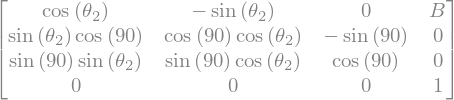

In [30]:
T12 = robotics_sympy.DH(90,B,th2,0)
T12

- what's wrong with the above result?

In [31]:
p90 = sympy.pi/2

In [32]:
#your code here

### Comprehension Questions

- what does the zero mean in `v_tip2f2[0]`?
    - does it make sense?

### Next step

- Could we find the Jacobian for this robot?
    - how would that work? 

In [40]:
def J_row(v, theta_dots):
    row_list = []
    for theta_dot in theta_dots:
        #print("theta_dot = %s" % theta_dot)
        item = v.diff(theta_dot)
        row_list.append(item)
    return row_list

In [41]:
def find_J(vtip, theta_dots):
    J_list = []
    for v in vtip:
        cur_row = J_row(v,theta_dots)#<-- find the row of the Jacobian for vtip[0], vtip[1], ...
        J_list.append(cur_row)
    return sympy.Matrix(J_list)

In [42]:
def create_theta_dot_vect(thdot):
    return sympy.Matrix([[0],[0],[thdot]])

In [43]:
#your code here

### Comprehension Question

- what is the singularity condition?
- what is the physical meaning of the singularity condition?

## Problem 2: Simplified Three Link 3D


<img src="https://faculty.gvsu.edu/kraussry/445_images/learning_activities/jacobians/three_link_simplified.png" width=500px>


### Problem Statement

- Find $\bar{v}_{tip}$
- Find the Jacobian
- Find the singularity conditions

### Intro Comprehension Question

- what is $v_2$?
    - do you see it intuitively?
    - can we verify it mathematically?

In [50]:
th3, th3dot = sympy.symbols(['theta_3','\\dot{\\theta_3}'])
th3

In [51]:
th3dot

In [52]:
#your code here

## Answers

$$^3v_{tip} = \; \left[\begin{matrix}B \dot{\theta_2} \sin{\left(\theta_{3} \right)}\\B \dot{\theta_2} \cos{\left(\theta_{3} \right)} + C \left(\dot{\theta_2} + \dot{\theta_3}\right)\\- B \dot{\theta_1} \cos{\left(\theta_{2} \right)} - C \left(- \dot{\theta_1} \sin{\left(\theta_{2} \right)} \sin{\left(\theta_{3} \right)} + \dot{\theta_1} \cos{\left(\theta_{2} \right)} \cos{\left(\theta_{3} \right)}\right)\end{matrix}\right]$$

$$^3\mathbf{J} = \; \left[\begin{matrix}0 & B \sin{\left(\theta_{3} \right)} & 0\\0 & B \cos{\left(\theta_{3} \right)} + C & C\\- B \cos{\left(\theta_{2} \right)} - C \left(- \sin{\left(\theta_{2} \right)} \sin{\left(\theta_{3} \right)} + \cos{\left(\theta_{2} \right)} \cos{\left(\theta_{3} \right)}\right) & 0 & 0\end{matrix}\right]$$

$$\|^3\mathbf{J}\| = \; - B C \left(B \cos{\left(\theta_{2} \right)} + C \cos{\left(\theta_{2} + \theta_{3} \right)}\right) \sin{\left(\theta_{3} \right)}
$$

### Comprehension Questions

- does this Jacobian make sense?
    - what are all the singularity conditions?
    - what is the physical significance of each singularity condition?